In [29]:
#librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import spacy

Conjuntos de datos

In [3]:
abstracts_train = pd.read_csv('abstracts_train.csv', sep='\t')
entities_train = pd.read_csv('entities_train.csv', sep='\t')
relations_train = pd.read_csv('relations_train.csv', sep='\t')

### Limpieza de datos para abstracts_train

In [4]:
# Eliminar filas con valores nulos si es necesario
abstracts_train = abstracts_train.dropna()

# Eliminar caracteres especiales y convertir a minúsculas
abstracts_train['title'] = abstracts_train['title'].apply(lambda x: x.lower())
abstracts_train['abstract'] = abstracts_train['abstract'].apply(lambda x: x.lower())
abstracts_train['title'] = abstracts_train['title'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
abstracts_train['abstract'] = abstracts_train['abstract'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

### Limpieza de datos para entities_train

In [5]:
# Eliminar filas con valores nulos si es necesario
entities_train = entities_train.dropna()
# Eliminar caracteres especiales y convertir a minúsculas
entities_train['mention'] = entities_train['mention'].apply(lambda x: x.lower())
entities_train['mention'] = entities_train['mention'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Tokenización y eliminación de palabras vacías (stopwords)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

entities_train['mention'] = entities_train['mention'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Limpieza de datos para relations_train

In [6]:
# Eliminar filas con valores nulos
relations_train = relations_train.dropna()
# Convertir la columna 'type' a minúsculas
relations_train['type'] = relations_train['type'].str.lower()
# Eliminar caracteres especiales y convertir a minúsculas en entity_1_id y entity_2_id
relations_train['entity_1_id'] = relations_train['entity_1_id'].apply(lambda x: x.lower())
relations_train['entity_2_id'] = relations_train['entity_2_id'].apply(lambda x: x.lower())


### Analisis exploratorio para abstracts_train

Exploracion incial de los datos

In [7]:
# Número de observaciones y variables
print("\nResumen de las variables:")
print(abstracts_train.info())


Resumen de las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   abstract_id  400 non-null    int64 
 1   title        400 non-null    object
 2   abstract     400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB
None


In [8]:
#Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(abstracts_train.describe())


Estadísticas descriptivas:
        abstract_id
count  4.000000e+02
mean   1.988738e+07
std    5.141908e+06
min    1.353340e+06
25%    1.641701e+07
50%    1.935622e+07
75%    2.388542e+07
max    3.083666e+07


In [9]:
# Longitud de títulos y resúmenes
title_lengths = abstracts_train['title'].apply(len)
abstract_lengths = abstracts_train['abstract'].apply(len)

<AxesSubplot: title={'center': 'Histograma de Longitud de Títulos'}, ylabel='Frequency'>

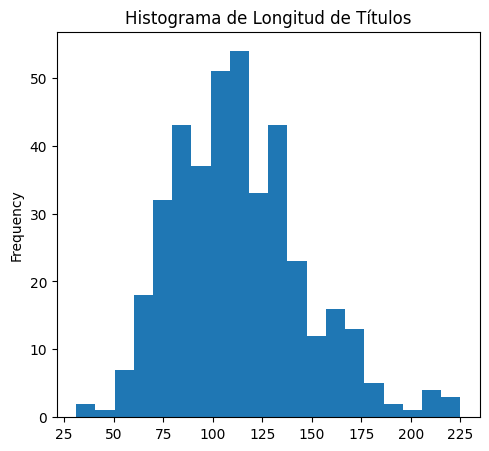

In [10]:
# Gráficos exploratorios para variables cuantitativas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
title_lengths.plot(kind='hist', bins=20, title='Histograma de Longitud de Títulos')


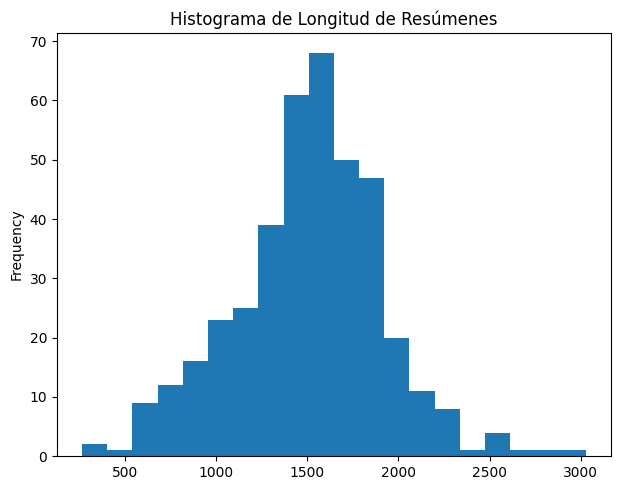

In [11]:
# Gráficos exploratorios para variables cuantitativas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
abstract_lengths.plot(kind='hist', bins=20, title='Histograma de Longitud de Resúmenes')
plt.tight_layout()
plt.show()

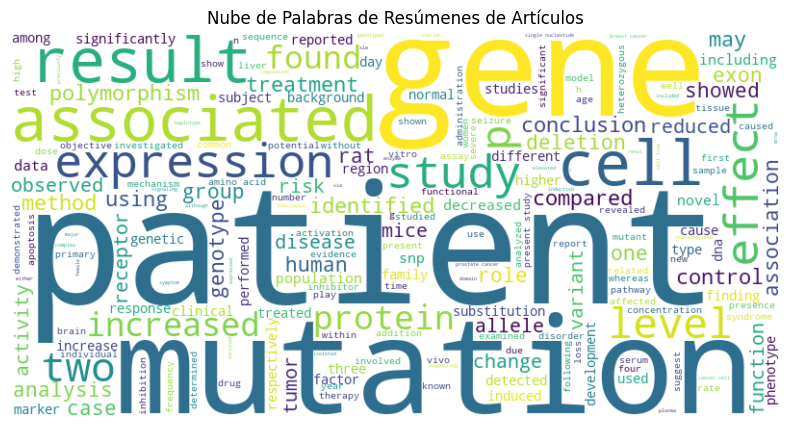

In [12]:
# Concatenar todos los resúmenes en un solo texto
all_abstracts = ' '.join(abstracts_train['abstract'])

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_abstracts)

# Mostrar la nube de palabras en una figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Resúmenes de Artículos')
plt.show()

### Analisis exploratorio para entities_train

In [13]:
print("\nResumen de variables:")
print(entities_train.info())


Resumen de variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             13636 non-null  int64 
 1   abstract_id    13636 non-null  int64 
 2   offset_start   13636 non-null  int64 
 3   offset_finish  13636 non-null  int64 
 4   type           13636 non-null  object
 5   mention        13636 non-null  object
 6   entity_ids     13636 non-null  object
dtypes: int64(4), object(3)
memory usage: 745.8+ KB
None


In [14]:
#Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(entities_train.describe())


Estadísticas descriptivas:
                id   abstract_id  offset_start  offset_finish
count  13636.00000  1.363600e+04  13636.000000   13636.000000
mean    6817.50000  2.077549e+07    866.302655     875.893297
std     3936.51847  5.081053e+06    587.106983     585.577367
min        0.00000  1.353340e+06      0.000000       3.000000
25%     3408.75000  1.700661e+07    369.000000     380.000000
50%     6817.50000  1.995705e+07    807.000000     816.000000
75%    10226.25000  2.511979e+07   1300.000000    1309.000000
max    13635.00000  3.083666e+07   3288.000000    3293.000000


In [15]:
# Tabla de frecuencia de tipos de entidades
print("\nTabla de frecuencia de tipos de entidades:")
print(entities_train['type'].value_counts())


Tabla de frecuencia de tipos de entidades:
GeneOrGeneProduct             4764
DiseaseOrPhenotypicFeature    3784
ChemicalEntity                2540
OrganismTaxon                 1420
SequenceVariant               1011
CellLine                       117
Name: type, dtype: int64


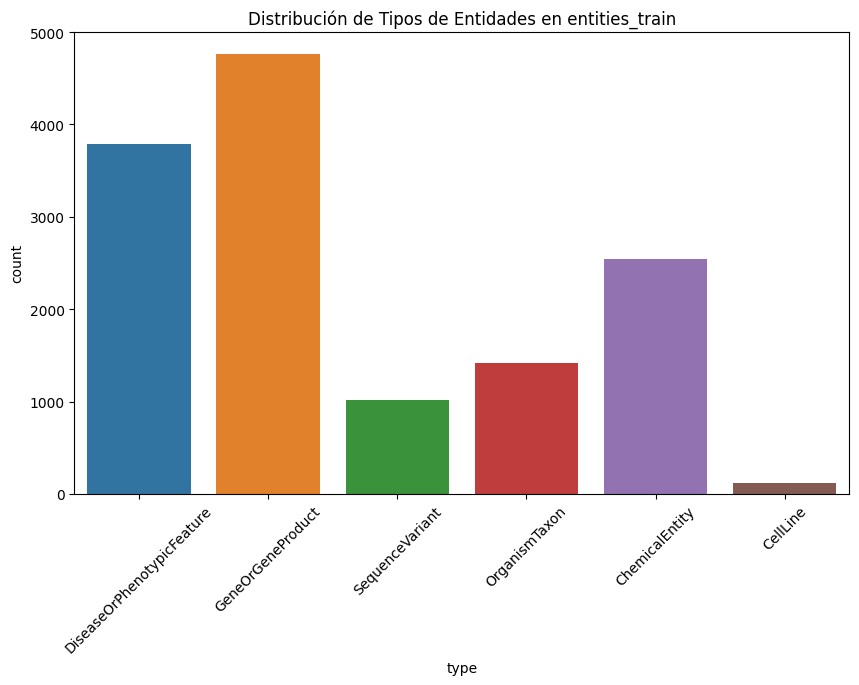

In [16]:
#gráfico de barras de tipos de entidades
plt.figure(figsize=(10, 6))
sns.countplot(data=entities_train, x='type')
plt.title("Distribución de Tipos de Entidades en entities_train")
plt.xticks(rotation=45)
plt.show()

### Analisis exploratorio para relations_train

In [17]:
print("\nResumen de variables:")
print(relations_train.info())


Resumen de variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4280 non-null   int64 
 1   abstract_id  4280 non-null   int64 
 2   type         4280 non-null   object
 3   entity_1_id  4280 non-null   object
 4   entity_2_id  4280 non-null   object
 5   novel        4280 non-null   object
dtypes: int64(2), object(4)
memory usage: 200.8+ KB
None


In [18]:
#Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(relations_train.describe())


Estadísticas descriptivas:
                id   abstract_id
count  4280.000000  4.280000e+03
mean   2139.500000  2.163559e+07
std    1235.673905  5.086272e+06
min       0.000000  1.353340e+06
25%    1069.750000  1.787994e+07
50%    2139.500000  2.058354e+07
75%    3209.250000  2.668424e+07
max    4279.000000  3.083666e+07


In [19]:
# Tabla de frecuencia de tipos de relaciones
print("\nTabla de frecuencia de tipos de relaciones:")
print(relations_train['type'].value_counts())


Tabla de frecuencia de tipos de relaciones:
association             2274
positive_correlation    1159
negative_correlation     721
bind                      69
cotreatment               29
comparison                22
drug_interaction           3
conversion                 3
Name: type, dtype: int64


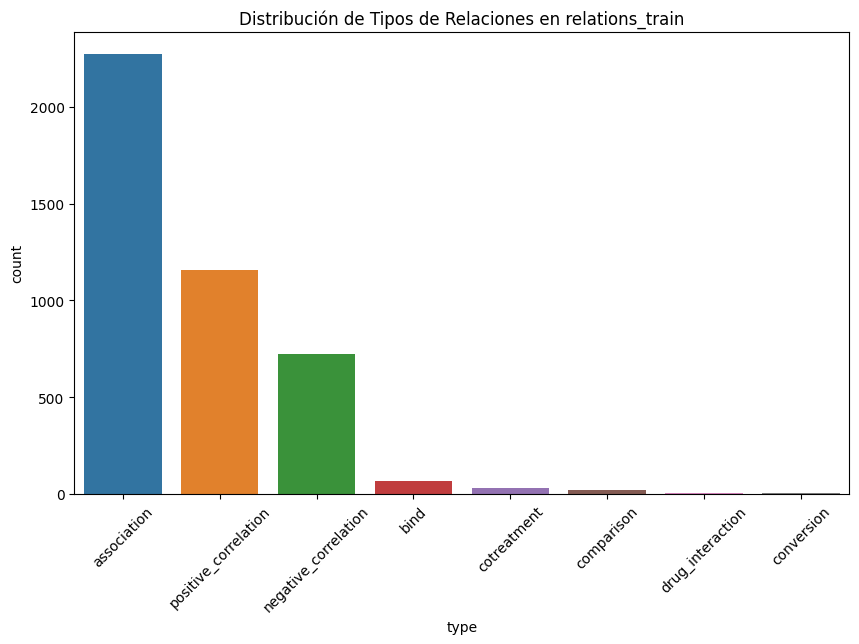

In [20]:
#gráfico de barras de tipos de relaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=relations_train, x='type')
plt.title("Distribución de Tipos de Relaciones en relations_train")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Tabla de frecuencia de la novedad de relaciones
print("\nTabla de frecuencia de novedad de relaciones:")
print(relations_train['novel'].value_counts())


Tabla de frecuencia de novedad de relaciones:
Novel    2958
No       1322
Name: novel, dtype: int64


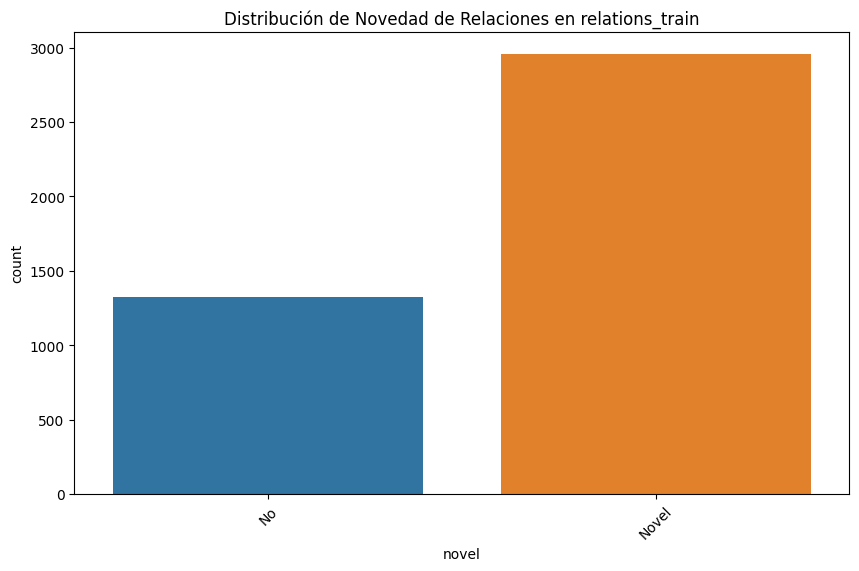

In [22]:
#gráfico de barras de tipos de relaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=relations_train, x='novel')
plt.title("Distribución de Novedad de Relaciones en relations_train")
plt.xticks(rotation=45)
plt.show()